
Logistic Regression

oleh:
1. Istiqamatul Badriah (G1A017013)
2. Sefti Wulandari (G1A017016)

link dataset kaggle:
https://www.kaggle.com/jessemostipak/animal-crossing?select=user_reviews.csv



In [2]:

 #Install Library
!pip install vaderSentiment

     |████████████████████████████████| 133kB 7.5MB/s 


In [3]:
pip install nltk

In [4]:
pip install kaggle

In [5]:
pip install matplotlib

In [30]:
pip install seaborn

In [7]:
pip install sklearn2

     |████████████████████████████████| 81kB 4.7MB/s 


In [8]:
pip install imblearn

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import time
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.stem import PorterStemmer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Import Data dari Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"seftiwulandari","key":"f481646886a4cae1292b4d83a62c8442"}'}

# Membuat folder kaggle untuk lokasi file .json yang telah diupload sebelumnya

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Menampilkan list dataset

In [6]:
!kaggle datasets list

ref                                                          title                                           size  lastUpdated          downloadCount  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  
alexgude/california-traffic-collision-data-from-switrs       California Traffic Collision Data from SWITRS    1GB  2020-11-22 16:51:55           1564  
babyoda/women-entrepreneurship-and-labor-force               Women Entrepreneurship and Labor Force           1KB  2020-11-21 08:38:51           3688  
szymonjanowski/internet-articles-data-with-users-engagement  Internet news data with readers engagement       3MB  2020-11-21 17:09:57           1761  
sakshigoyal7/credit-card-customers                           Credit Card customers                          379KB  2020-11-19 07:38:44           7015  
imoore/2020-us-general-election-turnout-rates                2020 US General Election Tu

# Download dataset dari kaggle

In [7]:
!kaggle datasets download -d jessemostipak/animal-crossing

  0% 0.00/754k [00:00<?, ?B/s]
100% 754k/754k [00:00<00:00, 51.4MB/s]


# Extract zip file atau dataset yang telah didownload sebelumnya dari kaggle
[ ]
↳ 1 sel tersembunyi

In [8]:
import zipfile
zip_ref = zipfile.ZipFile('animal-crossing.zip','r')
zip_ref.extractall('files')
zip_ref.close()

# Membaca data user_reviews yang akan kita gunakan

In [9]:
import pandas as pd
data = pd.read_csv("files/user_reviews.csv")
data.head()

,grade,user_name,text,date
0,4,mds27272,My gf started playing before me. No option to ...,2020-03-20
1,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20
2,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20
3,0,Houndf,We need equal values and opportunities for all...,2020-03-20
4,0,ProfessorFox,BEWARE! If you have multiple people in your h...,2020-03-20


In [10]:
# Merubah keseluruhan kalimat di kolom yang dipilih menjadi huruf kecil
data['text'] = data['text'].str.lower()
data.head()

,grade,user_name,text,date
0,4,mds27272,my gf started playing before me. no option to ...,2020-03-20
1,5,lolo2178,"while the game itself is great, really relaxin...",2020-03-20
2,0,Roachant,my wife and i were looking forward to playing ...,2020-03-20
3,0,Houndf,we need equal values and opportunities for all...,2020-03-20
4,0,ProfessorFox,beware! if you have multiple people in your h...,2020-03-20


In [11]:
# Remove Duplicate Row from Table
data = data.drop_duplicates()
data.shape

(2999, 4)

In [12]:
#Mendeskripsikan data
data.describe()

,grade
count,2999.000000
mean,4.217406
std,4.349486
min,0.000000
25%,0.000000
50%,2.000000
75%,10.000000
max,10.000000


In [13]:
#Menampilkan nilai boolean rata-rata
data.isna().mean()

grade        0.0
user_name    0.0
text         0.0
date         0.0
dtype: float64

In [22]:
pip install -U statsmodels

     |████████████████████████████████| 9.5MB 5.2MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


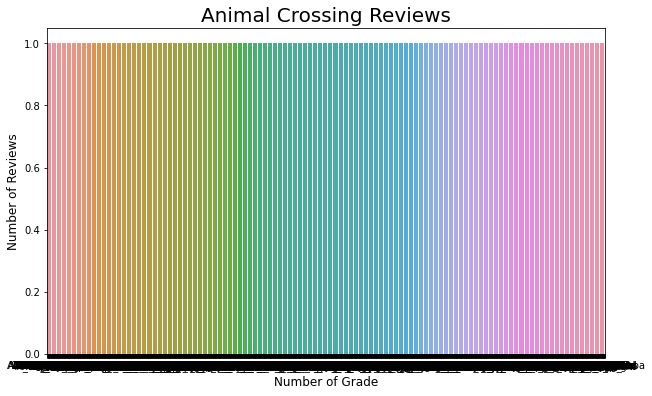

In [39]:
#Menampilkan grafik Reviews

stars_count = data['user_name'].value_counts()
stars_count = stars_count.sort_index()

fig = plt.figure(figsize=(10,6))
ax= sns.barplot(stars_count.index, stars_count.values)
plt.title("Animal Crossing Reviews",fontsize = 20) 
plt.ylabel('Number of Reviews', fontsize = 12)
plt.xlabel('Number of Grade', fontsize = 12);


# Menampilkan molaritas data

In [27]:
data=data[data.grade != 3]

pd.set_option('mode.chained_assignment', None)
data["labels"] = data["grade"].apply(lambda x: 1 if x < 3  else 0) # positive as 0 and negative as 1
data = data.drop("grade",axis=1)

data.head()

,user_name,text,date,labels
0,mds27272,my gf started playing before me. no option to ...,2020-03-20,0
1,lolo2178,"while the game itself is great, really relaxin...",2020-03-20,0
2,Roachant,my wife and i were looking forward to playing ...,2020-03-20,1
3,Houndf,we need equal values and opportunities for all...,2020-03-20,1
4,ProfessorFox,beware! if you have multiple people in your h...,2020-03-20,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


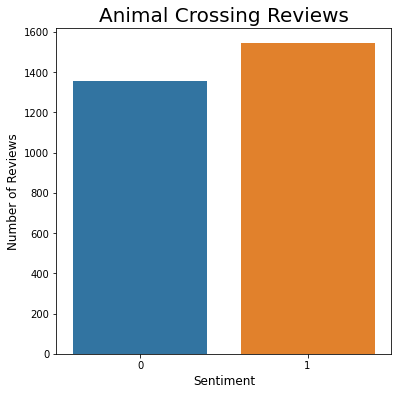

In [31]:
#Menampilkan data grafik dari labels
label_count = data['labels'].value_counts()
label_count = label_count.sort_index()

fig = plt.figure(figsize=(6, 6))
ax = sns.barplot(label_count.index, label_count.values)
plt.title("Animal Crossing Reviews",fontsize = 20)
plt.ylabel('Number of Reviews', fontsize = 12)
plt.xlabel('Sentiment', fontsize = 12);

In [40]:
print("{:.2f}".format(data[data.labels == 0].shape[0]/data.shape[0]))

0.47


In [41]:
punct = set(string.punctuation)

In [42]:
#membersihkan, dan menghapus/mengubah huruf dan tanda baca
def text_prep(text):
    #clean text
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    
    #remove non-letters and lower case
    text = re.sub('[^a-z\s]', '', text.lower())
    
    #remove punctuation        
    punc_removed = [char for char in text if char not in punct]
    punc_removed = ''.join(punc_removed)
    
    return [word for word in punc_removed.split()]

In [57]:
#Membuat vektor data

start_time = time.time()
cv= CountVectorizer(binary=True, analyzer = text_prep, min_df = 10, max_df = 0.95)
cv.fit_transform(train['text'].values.astype('U'))
train_feature_set=cv.transform(train['text'].values.astype('U'))
test_feature_set=cv.transform(test['text'].values.astype('U'))
print("Time takes to convert text input into feature vector: ", round((time.time() - start_time)/60, 2), " mins")

NameError: ignored

In [46]:
train_feature_set.shape[1]

NameError: ignored

In [ ]:
cv.vocabulary_['love']

In [ ]:
list(cv.vocabulary_.keys())[list(cv.vocabulary_.values()).index(1000)]

In [49]:
y_train = train['labels'].values
y_test = test['labels'].values

NameError: ignored

In [50]:
start_time = time.time()
lr = LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)
lr.fit(train_feature_set,y_train)
y_pred = lr.predict(test_feature_set)
print("Time takes to train model and make predictions: ", round((time.time() - start_time)/60, 2), " mins")

NameError: ignored

In [51]:
print("Accuracy: ",round(metrics.accuracy_score(y_test,y_pred),3))
print("F1: ",round(metrics.f1_score(y_test, y_pred),3))

NameError: ignored

# Menampilkan Logistic Regression Confusion matrix, with normalization

In [53]:
disp = metrics.plot_confusion_matrix(lr, test_feature_set, y_test,
                                 display_labels=['Positive', 'Negative'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Logistic Regression Confusion matrix, with normalization');

NameError: ignored